In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, GaussianNoise, Conv1D
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt

In [2]:
import import_ipynb
from data_handler import get_data_from_file

importing Jupyter notebook from data_handler.ipynb


In [3]:
def add_max_column(tst):
    p = np.max(np.abs(tst), axis=1)
    tst= np.c_[tst, p]
    return tst

def normalize_and_remove_max_column(tst, upper_limit):
    m = tst[:,-1:]
    r = upper_limit/m
    return  tst[:,:-1]*r

In [4]:
x,y = datasets.load_boston(return_X_y=True)
DATA_UPPER_LIMIT = 100
data_folder = '/Users/macbook/Documents/Code/MICAS/MICAS_913/micas913-project-ismail/micas913-data'
x,y = get_data_from_file(100, data_folder)
x = add_max_column(x)
y = add_max_column(y)
x = normalize_and_remove_max_column(x, DATA_UPPER_LIMIT)
y = normalize_and_remove_max_column(y, DATA_UPPER_LIMIT)

swapping
(5000, 4096) (5000, 4096)


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = .2)

In [7]:
activation_fct = 'relu'
gauss_noise = False
batch_norm = True

In [8]:
def dense_model(activation_fct, gauss_noise, batch_norm):
    model = Sequential()
    model.add(Dense(4096, input_dim=x.shape[1], activation=activation_fct))
    if gauss_noise:
        model.add(GaussianNoise(1.0))
    if batch_norm:
        model.add(BatchNormalization())
    model.add(Dense(8192, activation=activation_fct))
    if gauss_noise:
        model.add(GaussianNoise(1.0))
    if batch_norm:
        model.add(BatchNormalization())
    model.add(Dense(8192, activation=activation_fct))
    if gauss_noise:
        model.add(GaussianNoise(1.0))
    if batch_norm:
        model.add(BatchNormalization())
    model.add(Dense(y.shape[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [9]:
model = dense_model(activation_fct, gauss_noise, batch_norm)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4096)              16781312  
_________________________________________________________________
batch_normalization (BatchNo (None, 4096)              16384     
_________________________________________________________________
dense_1 (Dense)              (None, 8192)              33562624  
_________________________________________________________________
batch_normalization_1 (Batch (None, 8192)              32768     
_________________________________________________________________
dense_2 (Dense)              (None, 8192)              67117056  
_________________________________________________________________
batch_normalization_2 (Batch (None, 8192)              32768     
_________________________________________________________________
dense_3 (Dense)              (None, 4096)              3

In [10]:
model.fit(X_train, Y_train, epochs=200, batch_size=32,validation_split=0.1, verbose = 2)

Epoch 1/200
113/113 - 152s - loss: 872.4393 - val_loss: 840.6732
Epoch 2/200
113/113 - 145s - loss: 770.8297 - val_loss: 802.3333
Epoch 3/200
113/113 - 153s - loss: 676.7734 - val_loss: 767.6019
Epoch 4/200
113/113 - 182s - loss: 596.2599 - val_loss: 738.4048
Epoch 5/200
113/113 - 163s - loss: 524.6891 - val_loss: 714.1246
Epoch 6/200
113/113 - 163s - loss: 463.2291 - val_loss: 695.4794
Epoch 7/200
113/113 - 164s - loss: 410.3675 - val_loss: 680.7266
Epoch 8/200
113/113 - 162s - loss: 364.5970 - val_loss: 669.9581
Epoch 9/200
113/113 - 128s - loss: 324.0639 - val_loss: 662.2831
Epoch 10/200
113/113 - 159s - loss: 287.5063 - val_loss: 655.5211
Epoch 11/200
113/113 - 169s - loss: 254.3148 - val_loss: 650.3432
Epoch 12/200
113/113 - 165s - loss: 225.0592 - val_loss: 645.6013
Epoch 13/200
113/113 - 164s - loss: 199.3862 - val_loss: 640.4817
Epoch 14/200
113/113 - 165s - loss: 176.8881 - val_loss: 635.4716
Epoch 15/200
113/113 - 162s - loss: 157.7318 - val_loss: 631.4539
Epoch 16/200
113/11

Epoch 127/200
113/113 - 150s - loss: 49.3306 - val_loss: 571.9173
Epoch 128/200
113/113 - 173s - loss: 49.3048 - val_loss: 571.7610
Epoch 129/200
113/113 - 133s - loss: 49.1002 - val_loss: 571.5754
Epoch 130/200
113/113 - 153s - loss: 49.1957 - val_loss: 571.4777
Epoch 131/200
113/113 - 169s - loss: 48.7939 - val_loss: 570.8175
Epoch 132/200
113/113 - 139s - loss: 49.0229 - val_loss: 570.8448
Epoch 133/200
113/113 - 156s - loss: 48.5929 - val_loss: 570.3576
Epoch 134/200
113/113 - 160s - loss: 48.7368 - val_loss: 570.1238
Epoch 135/200
113/113 - 160s - loss: 48.4235 - val_loss: 569.8346
Epoch 136/200
113/113 - 161s - loss: 48.4483 - val_loss: 570.1135
Epoch 137/200
113/113 - 160s - loss: 48.1668 - val_loss: 569.6120
Epoch 138/200
113/113 - 159s - loss: 48.2739 - val_loss: 569.7177
Epoch 139/200
113/113 - 160s - loss: 48.5252 - val_loss: 569.0426
Epoch 140/200
113/113 - 158s - loss: 48.1341 - val_loss: 569.1164
Epoch 141/200
113/113 - 160s - loss: 48.1745 - val_loss: 568.9479
Epoch 142/

KeyboardInterrupt: 

In [11]:
cost = model.evaluate(X_test, Y_test)

32/32 [==============================] - 6s 188ms/step - loss: 567.7495


In [12]:
y_hat = model.predict(X_test)
nrmse = np.sqrt(np.mean(np.square(Y_test - y_hat)))/np.mean(np.square(Y_test))
print(nrmse)

0.026565655022481337


852


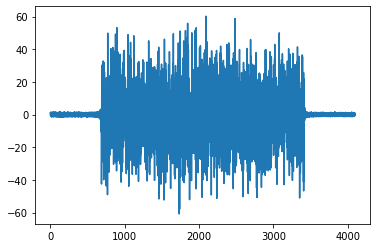

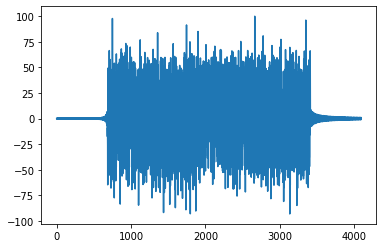

In [13]:
index = np.random.choice(range(Y_test.shape[0]),1)[0]
print(index)
plt.plot(y_hat[index])
plt.show()
plt.plot(Y_test[index])
plt.show()

In [14]:
t_hat = model.predict(X_train)

422


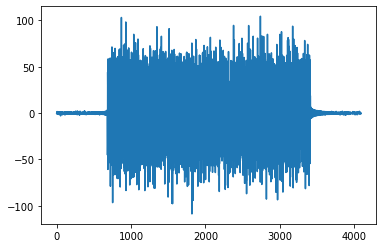

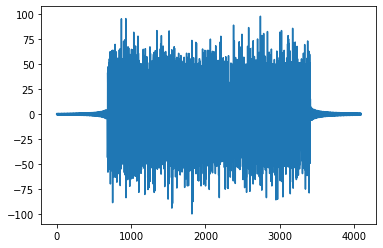

In [15]:
index = np.random.choice(range(Y_train.shape[0]),1)[0]
print(index)
plt.plot(t_hat[index])
plt.show()
plt.plot(Y_train[index])
plt.show()

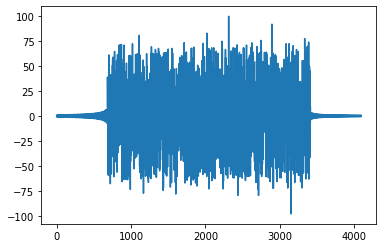

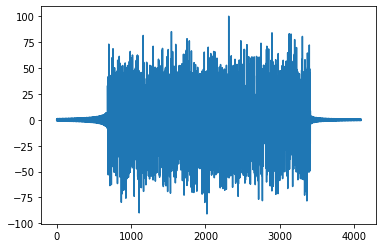

In [16]:
plt.plot(x[10])
plt.show()
plt.plot(y[10])
plt.show()